<a href="https://colab.research.google.com/github/jimsjoo/finance/blob/master/ALGO_MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MACD crossover to determine when to buy and sell stock

In [23]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
ticker = 'AAPL'
df = web.DataReader(ticker, data_source='yahoo',start='2017-04-20', end='2017-08-24')

In [24]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.930340
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.889851
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,34.216194
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.428196
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,34.225719
...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.820560
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.750916
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,38.368046


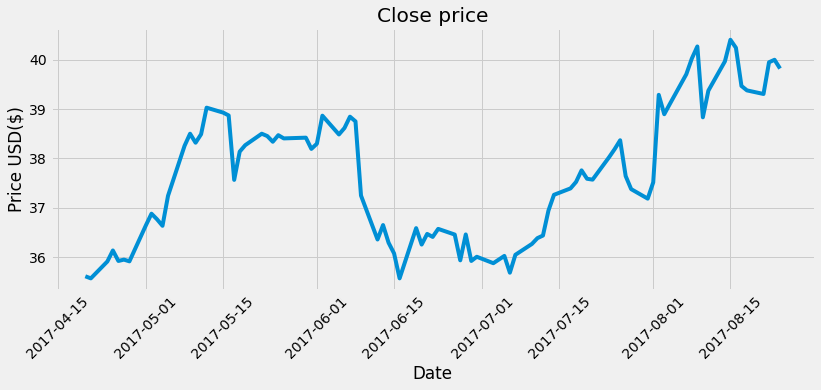

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close price')
plt.xlabel('Date')
plt.ylabel('Price USD($)')
plt.show()

In [26]:
shortEMA =  df.Close.ewm(span=12, adjust=False).mean()
longEMA =  df.Close.ewm(span=26, adjust=False).mean()
MACD = shortEMA - longEMA
signal = MACD.ewm(span=9, adjust=False).mean()
signal

Date
2017-04-20    0.000000
2017-04-21   -0.000678
2017-04-24    0.003720
2017-04-25    0.014611
2017-04-26    0.025577
                ...   
2017-08-18    0.670928
2017-08-21    0.658028
2017-08-22    0.647192
2017-08-23    0.637540
2017-08-24    0.624850
Name: Close, Length: 89, dtype: float64

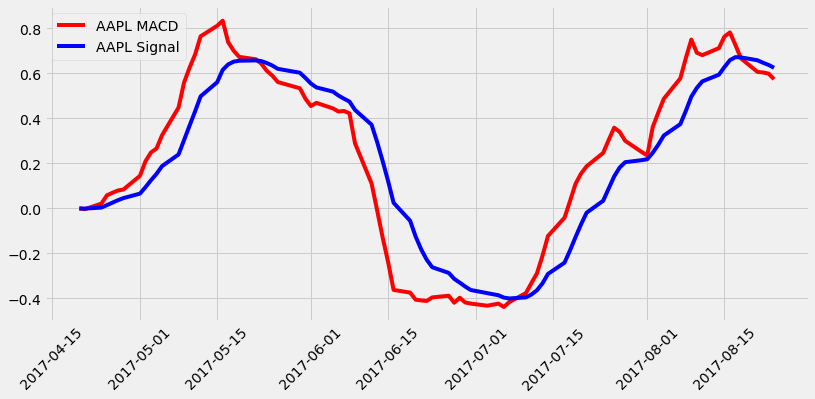

In [27]:
plt.figure(figsize=(12.2, 5.4))
plt.plot(df.index, MACD, label='AAPL MACD', color='red')
plt.plot(df.index, signal, label='AAPL Signal', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [28]:
df['MACD'] = MACD
df['Signal'] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal
Date,,,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.930340,0.000000,0.000000
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.889851,-0.003390,-0.000678
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,34.216194,0.021314,0.003720
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.428196,0.058176,0.014611
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,34.225719,0.069441,0.025577
...,...,...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.820560,0.666326,0.670928
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.750916,0.606431,0.658028
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,38.368046,0.603847,0.647192


In [44]:
def get_signal(signal):
  buy_signal = []
  sell_signal = []
  flag = -1
  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal'][i]:
      sell_signal.append(np.nan)
      if flag != 1:
        buy_signal.append(signal['Close'][i])
        flag = 1
      else:
        buy_signal.append(np.nan)
    elif signal['MACD'][i] < signal['Signal'][i]:
      buy_signal.append(np.nan)
      if flag != 0:
        sell_signal.append(signal['Close'][i])
        flag = 0
      else:
        sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)  
  return (buy_signal, sell_signal)     

In [46]:
s = get_signal(df)
print(len(s[0]),len(df))
df['Buy_signal_price'] = s[0]
df['Sell_signal_price'] = s[1]

89 89


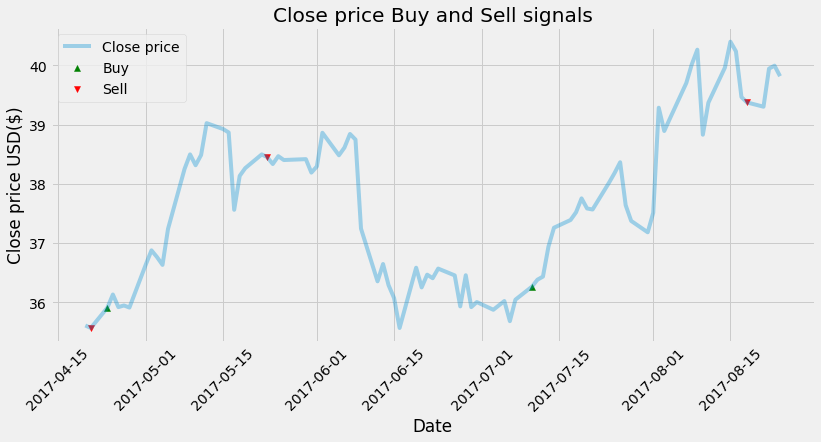

In [47]:
plt.figure(figsize=(12.2, 5.4))
plt.scatter(df.index, df['Buy_signal_price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_signal_price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close price', alpha=0.35)
plt.title('Close price Buy and Sell signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close price USD($)')
plt.legend(loc='upper left')
plt.show()